# Step 1. Environment Setting

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

INPUT_DIR = "../kaggle/input/titanic/"
OUTPUT_DIR = "../kaggle/output/titanic/"

import os
for dirname, _, filenames in os.walk(INPUT_DIR):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train_df = pd.read_csv(INPUT_DIR + "train.csv")
test_df = pd.read_csv(INPUT_DIR + "test.csv")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../kaggle/input/titanic/gender_submission.csv
../kaggle/input/titanic/test.csv
../kaggle/input/titanic/train.csv


# Step 2. Debug CSV Data

## 2-1. TOP Visualizations

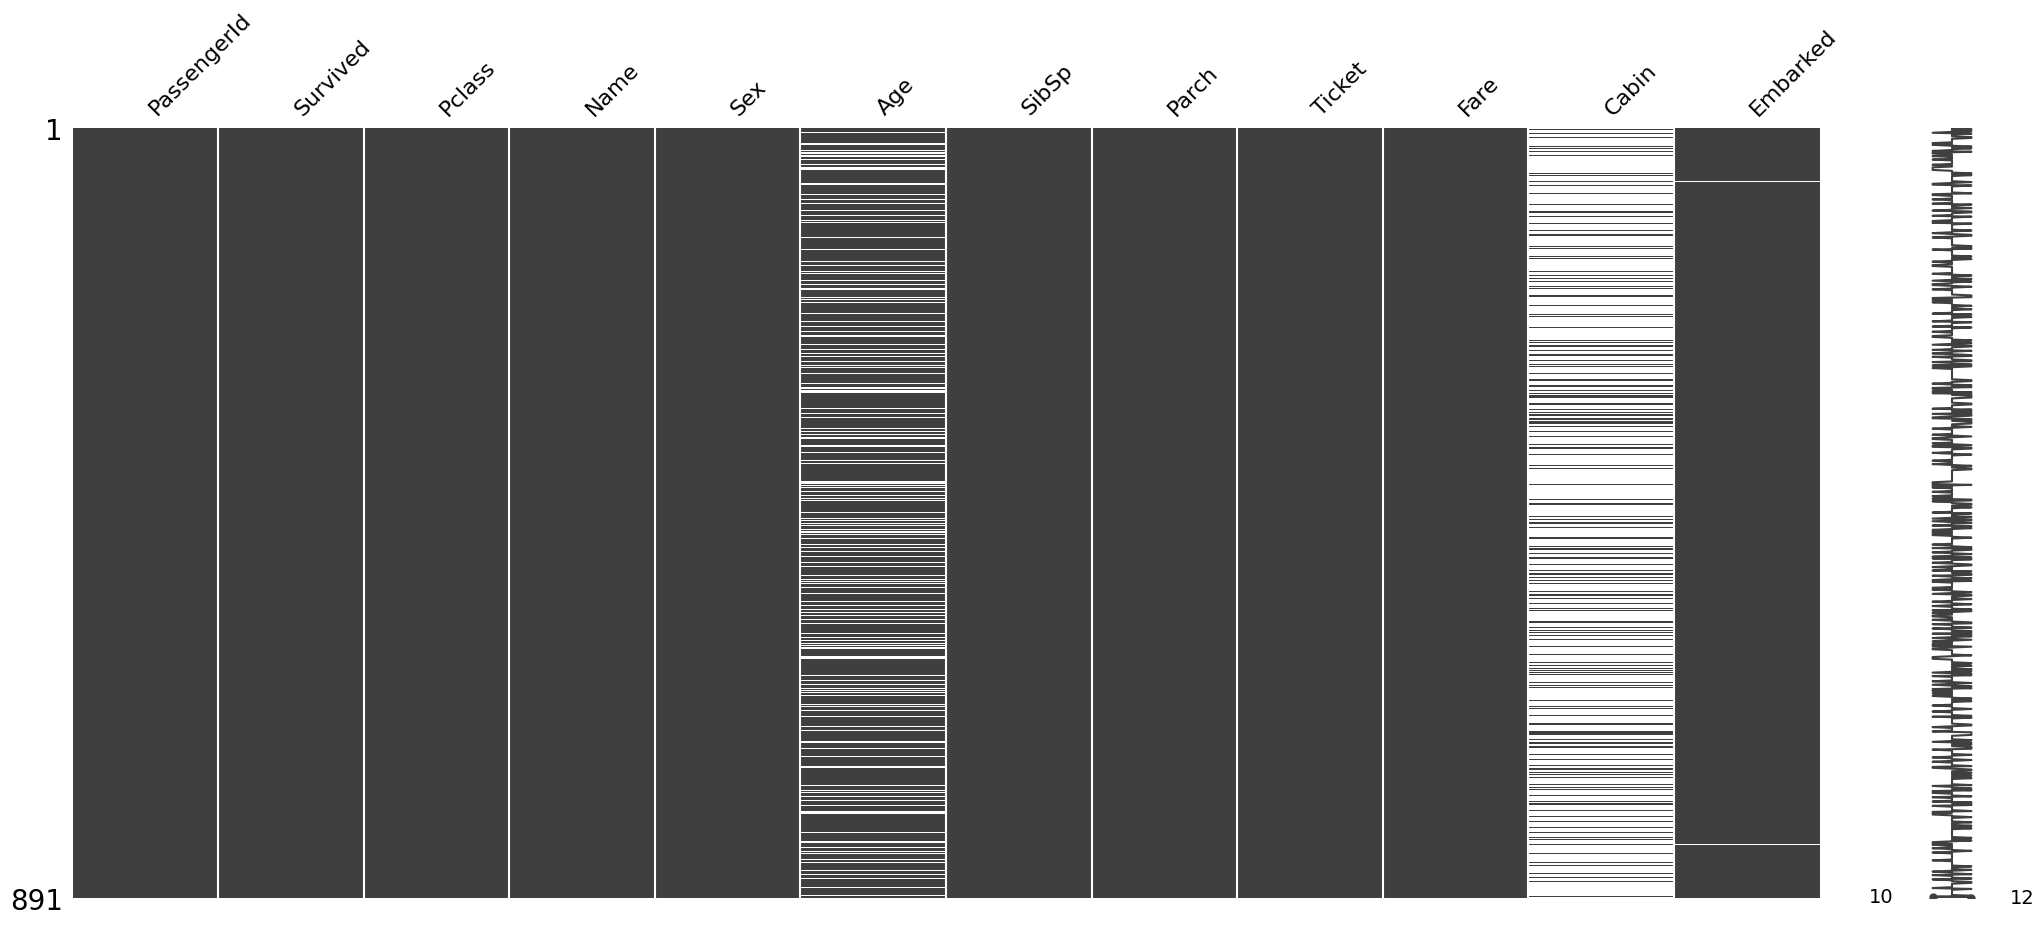

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


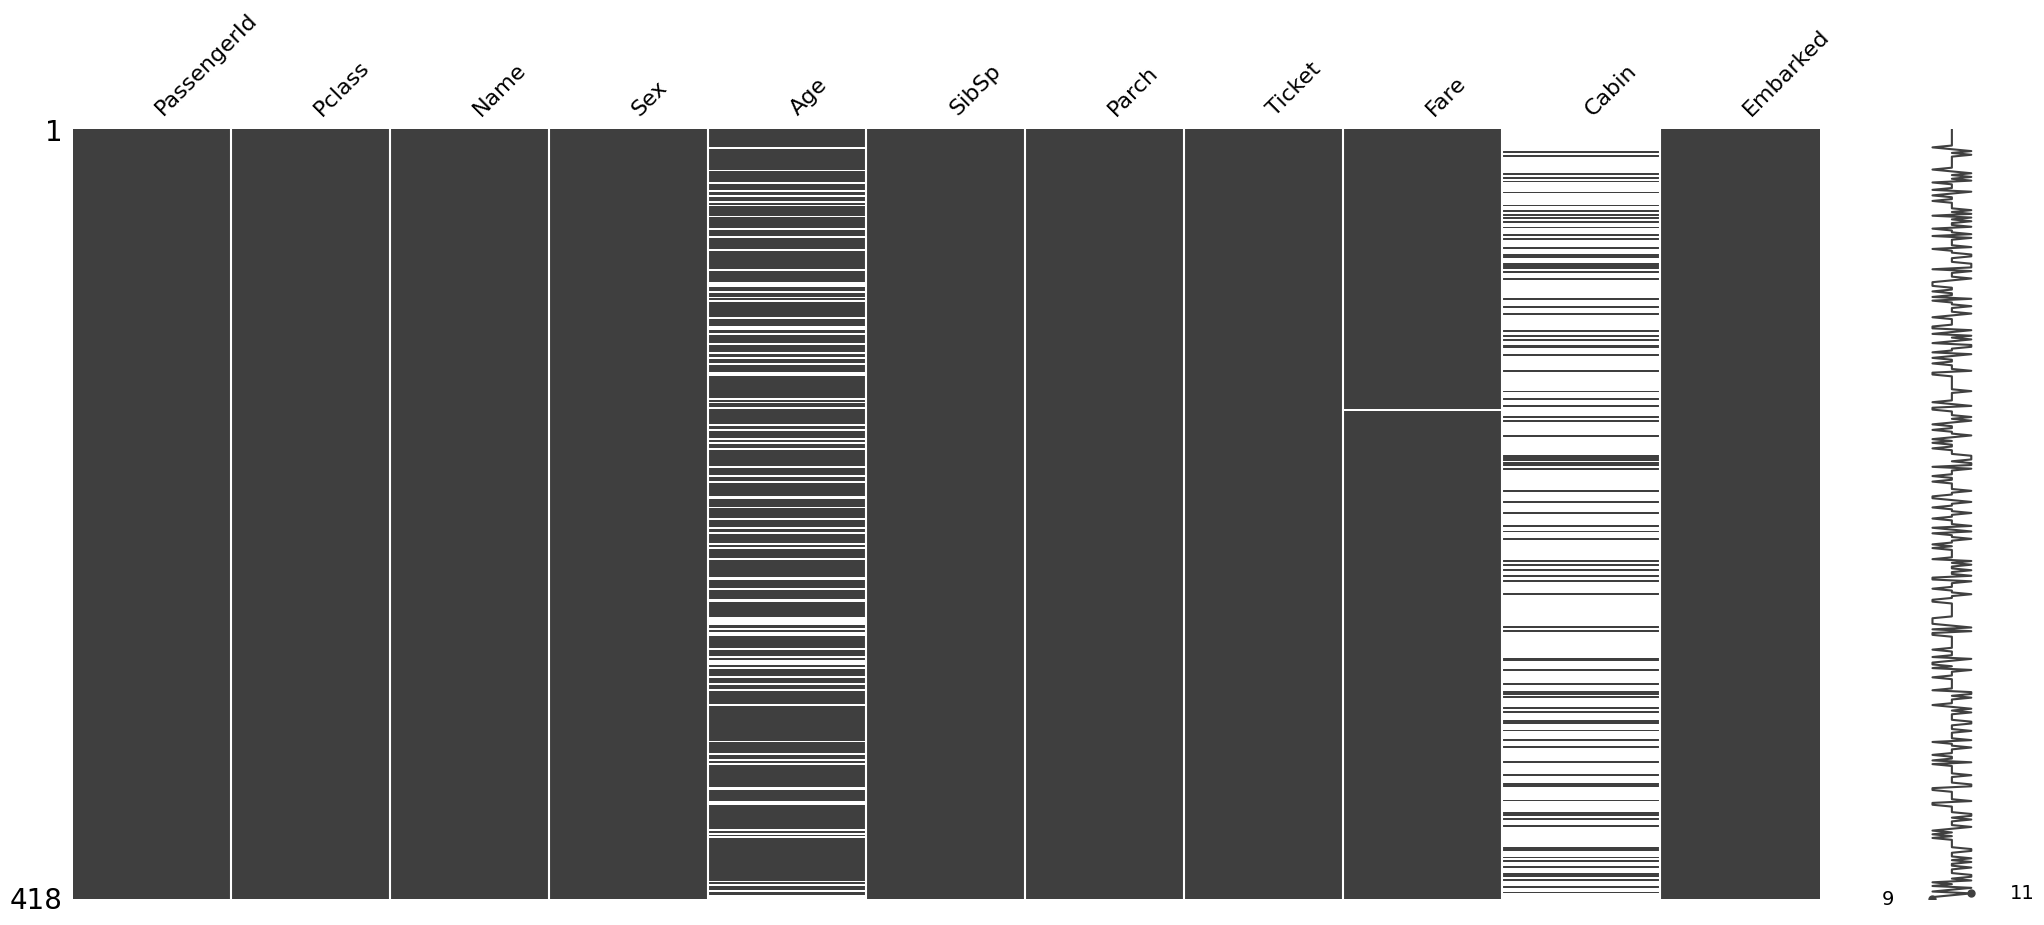

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

msno.matrix(train_df)
plt.show()
train_df.info()
train_df.isnull().sum()

msno.matrix(test_df)
plt.show()
test_df.info()
test_df.isnull().sum()

## 2-2. Some Visualizations

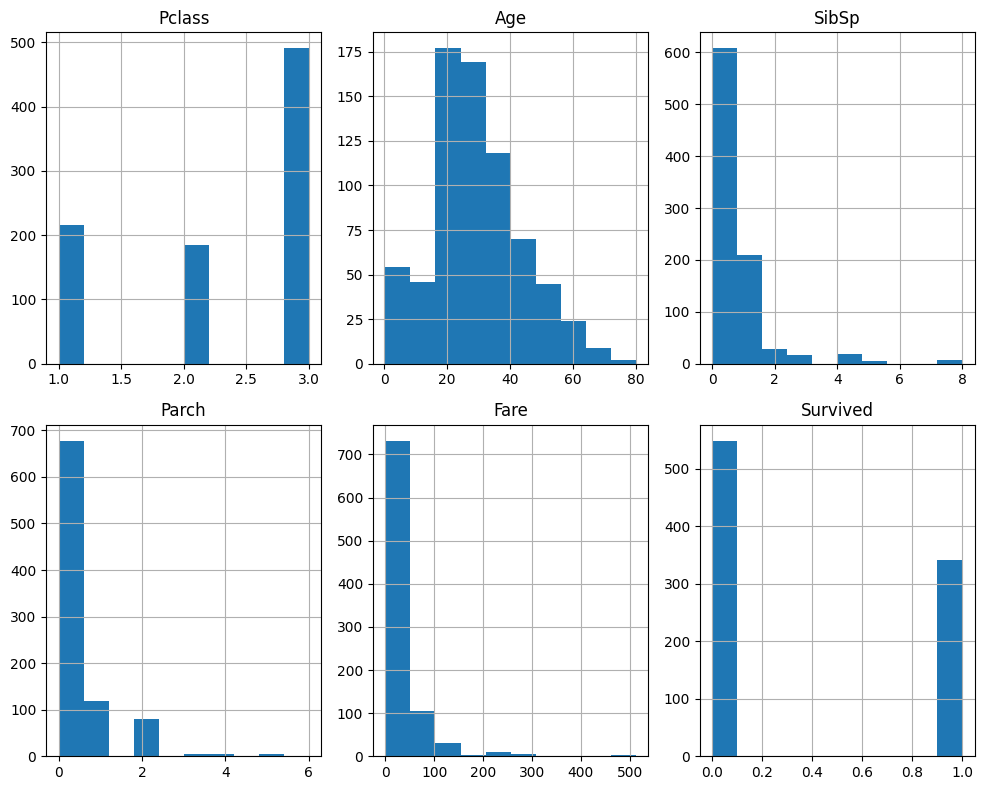

In [34]:
columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

plt.figure(figsize=(10,8))

for i in range(6):
    plt.subplot(2,3, i+1)
    plt.title(str(columns[i]))
    train_df[str(columns[i])].hist()

plt.tight_layout()
plt.show()

# Step 3. Data Processing

## 3-1. feature engineering ('Embarked' column)

In [ ]:
# One-Hot Encoding
# labelEncoder = LabelEncoder()
# train_df['Sex'] = labelEncoder.fit_transform(train_df['Sex'])

# Missing Value
# train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Step 4. Model Test

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

y = train_df["Survived"]

# Create X (After completing the exercise, you can return to modify this line!)
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_df[features])
print(X.head())

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(train_X, train_y)
predictions = model.predict(val_X)
mae = mean_absolute_error(predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(mae))

   Pclass  SibSp  Parch  Sex_female  Sex_male
0       3      1      0           0         1
1       1      1      0           1         0
2       3      0      0           1         0
3       1      1      0           1         0
4       3      0      0           0         1
Validation MAE for Random Forest Model: 0


# Step 5. Model Training

In [19]:
# To improve accuracy, create a new Random Forest model which you will train on all training data
model_on_full_data = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# fit rf_model_on_full_data on all data from the training data
model_on_full_data.fit(X, y)

RandomForestClassifier(max_depth=5, random_state=1)

# Step 6. Prediction

In [24]:
test_X = pd.get_dummies(test_df[features])
prediction = model_on_full_data.predict(test_X)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': prediction})
output.to_csv(OUTPUT_DIR + 'submission.csv', index=False)